# 2022 COSE361 실습 4차시- Machine learning 2

<과제 제출방법>

1.   제목 끝에 학번과 이름을 추가합니다. 예시) 인공지능_4차시_20XXXXXXXX_이름
2.   주피터노트북의 모든 코드가 오류없이 돌아가도록 실습 활동을 완료합니다.
3.   모든 셀이 출력되어있는 상태로 제출합니다
-------------------------------------------------------------------------------------------------------------------

본 실습은 아래와 같이 이루어져있습니다.
1. Perceptron
    - XOR problem
    
2. MLP    
    - XOR problem
    
    -  bread cancer data
        - Cross validation
        - Gridsearchcv
3. 과제

# **1. Perceptron**

퍼셉트론은 신경망의 가장 기초가 되는 기본 단위입니다.

자세히 보면 "퍼셉트론(Perceptron)"이라는 단어는 두 단어의 조합임을 알 수 있습니다.

* Perception 무엇인가를 감지할 수 있는 능력
* Neuron 사람의 뇌에 주어지는 입력을 의미있는 정보로 변환하는 신경 세포

### **퍼셉트론(Perceptron)의 구성 요소**

퍼셉트론은 간단한 결정을 내릴 수 있는 인공 뉴런이라고 할 수 있습니다.

퍼셉트론은 3가지 구성요소로 이루어져 있습니다.

* 입력(Inputs): 각각의 입력 값은 feature에 대응합니다. 

* 가중치(Weights): 각 입력은, 중요도를 나타내는 가중치를 가지고 있습니다. 입력의 가중치가 크다는 것은, 결정을 내림에 있어서 해당 입력값이 중요한 역할을 하고 있다는 것을 의미합니다.

* 출력(Output): 마지막으로, 퍼셉트론은 입력과 가중치를 사용하여 출력을 생성합니다. 출력 유형은 문제의 특성 및 데이터 도메인에 따라 다릅니다. 참과 거짓을 해결해야하는 문제(Classification)라면 0 또는 1로 출력값을 나타내야할 것이고, 만약 결과값이 연속된 수치(Regression)라면 정수로 결과값을 표현할 수 있어야할 것입니다.

![Perceptron](http://incredible.ai/assets/posts/Perceptron/perceptron.png)

이제, perceptron으로 AND OR XOR 데이터를 분류해보도록 합시다. 

#  XOR problem

![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FsEm4q%2FbtqHemtBDX5%2FxKv8Pa7Pj1Gw5WPBhUHKY0%2Fimg.png)

AND, OR, XOR 데이터에 대해 Perceptron으로 분류해보도록 하겠습니다. 시각화를 도와주는 utils.py를 사용하도록 할 것입니다. import해주고 실험을 진행하도록 하겠습니다.

In [3]:
#제공된 utils import
from utils import *
#numpy import
import numpy as np
#sklearn에서 제공해주는 Perceptron import
from sklearn.linear_model import Perceptron

## 1-1. AND 데이터

In [4]:
#AND 데이터를 생성합니다.
and_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
#and label 
and_labels = np.array([0, 0, 0, 1])

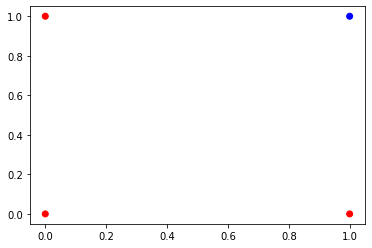

In [5]:
#utils에서 제공되는 plot_data 사용하여 AND데이터를 plot해봅시다
plot_data(and_data, and_labels)

In [6]:
#perceptron을 AND 데이터에 대하여 훈련시킵니다.
perceptron_and = Perceptron()
perceptron_and.fit(and_data, and_labels)

Perceptron()

In [7]:
perceptron_and.score(and_data, and_labels)

1.0

In [8]:
#perceptron의 AND score들을 출력합니다.
pred_scores = perceptron_and.decision_function(and_data)
print("Perceptron's AND scores: {}".format(pred_scores))

Perceptron's AND scores: [-2.  0.  0.  2.]


이제, Perceptron의 decision boundary를 플롯해봅시다. 왼쪽의 색상 막대는 w b x + b로 얻은 점수를 나타냅니다. 각 점 색상은 다른 클래스를 나타냅니다. (blue = 1, red = 0).

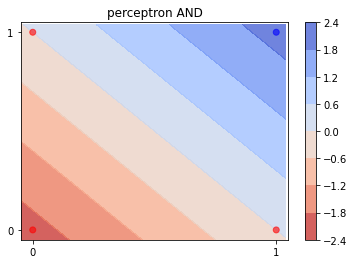

In [9]:
# colobar는 wx+b로 얻은 score를 나타냅니다.
plot_decision_boundary(perceptron_and, and_data, and_labels, "perceptron AND")

## 1-2. OR 데이터
AND와 마찬가지로 or데이터를 생성하여 perceptron으로 분류하도록 훈련시키도록 하겠습니다.

In [10]:
#or 데이터 생성
or_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

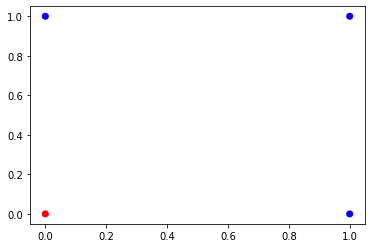

In [11]:
#utils에서 제공되는 plot_data 사용하여 OR데이터를 plot해봅시다
plot_data(or_data, or_labels)

In [12]:
#or 데이터 훈련
perceptron_or = Perceptron()
perceptron_or.fit(or_data, or_labels)

Perceptron()

In [13]:
#perceptron의 OR score들을 출력합니다.
pred_scores = perceptron_or.decision_function(or_data)
print("Perceptron's OR scores: {}".format(pred_scores))

Perceptron's OR scores: [-1.  1.  1.  3.]


In [14]:
perceptron_or.score(or_data, or_labels)

1.0

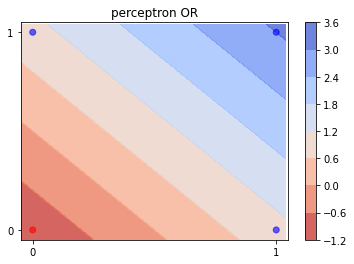

In [15]:
# colobar는 wx+b로 얻은 score를 나타냅니다.
plot_decision_boundary(perceptron_or, or_data, or_labels, "perceptron OR")

## 1.3 XOR 데이터
AND와 OR과 마찬가지로 XOR데이터에 대해서도 perceptron이 분류를 잘 할 수 있는지를 확인해보도록 하겠습니다.

In [16]:
#xor 데이터 생성
xor_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

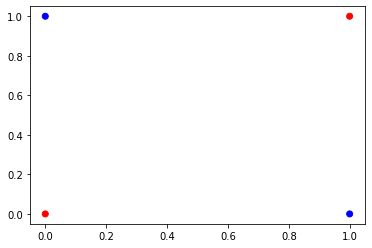

In [17]:
plot_data(xor_data, xor_labels)

명확하게, XOR은 선을 그어 구분 할 수 없음을 알 수 있습니다. 그래도 Perceptron으로 분류하도록 훈련시켜보도록 하겠습니다.

In [18]:
perceptron_xor = Perceptron()
perceptron_xor.fit(xor_data, xor_labels)

Perceptron()

In [19]:
perceptron_xor.score(xor_data, xor_labels)

0.5

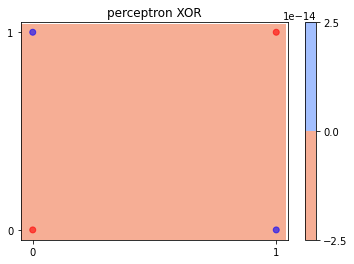

In [20]:
plot_decision_boundary(perceptron_xor, xor_data, xor_labels, "perceptron XOR")

XOR의 decision boundary가 없는 것을 확인 할 수 있습니다. 이제 Perceptron 모델 대신, MLPClassifier을 사용하여 XOR 데이터를 분류해보겠습니다. 아래 네 단계를 수행합니다.



# 2. Multi-layer Perceptron(MLP)

MLP는 입력층, 은닉층 및 출력층의 적어도 3개의 다른 층으로 구성된 뉴럴 네트워크입니다. 입력층을 제외한 나머지 층은 non-linaer activation function(ex: Sigmoid 또는 tanh)를 가진 Perceptron에 의해 구성됩니다. MLP는 보통 역전파 알고리즘을 사용하여 훈련되며 선형적으로 분리할 수 없는 문제에 대처할 수 있습니다. 

아래 애니메이션은 MLP가 훈련되는 과정을 간략하게 보여줍니다.

![](https://953894.smushcdn.com/2611031/wp-content/uploads/2019/10/Backpropagation.gif?lossy=0&strip=1&webp=1)


## 2-1 MLP XOR problem
이제 scikit-learn에서 제공해주는 MLPClassifier 메서드를 사용하여 XOR문제를 해결해보도록 하겠습니다.

1. scikit-learn의 MLPClassifier 모델을 생성하고 (모델의 이름은 ```mlp_xor```)합니다. 모델 파라미터는 다음과 같습니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

    - ```hidden_layer_sizes```: ```(5, )```
    - ```activation```: ```'tanh'```
    - ```max_iter``` : ```10000```

2. 생성된 모델을 데이터에 ```.fit()```해봅니다. 
3. ```.score()```로 데이터에 대해 정확도를 출력합니다.
4. ```plot_decision_boundary()``` 함수를 사용하여 훈련된 perceptron의 decision boundary를 시각화하고 **시각화된 plot을 바탕으로 올바르게 분류가 되었는지를 확인합니다.**.

In [21]:
#import MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp_xor = MLPClassifier(hidden_layer_sizes=(5, ), activation='tanh', max_iter=10000)
mlp_xor.fit(xor_data, xor_labels)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5,), max_iter=10000)

In [22]:
mlp_xor.score(xor_data, xor_labels)

1.0

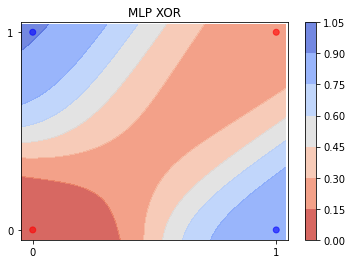

In [23]:
plot_decision_boundary(mlp_xor, xor_data, xor_labels, "MLP XOR")

decision boundary를 제대로 잘 설정한것을 볼 수 있습니다. 이로써, MLP는 선형적으로 분리할 수 없는 문제에 대처할 수 있음을 알 수 있습니다.

# 2-2 bread cancer 

이제 다른 복잡한 데이터를 사용하여 MLPClassifier을 훈련시키도록 해봅시다.

본 실습에서는bread cancer 데이터를 사용하도록 하겠습니다.


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [25]:
data_url = 'https://raw.githubusercontent.com/inikoreaackr/2020_Fall_ML/master/breastcancer.csv'
df = pd.read_csv(data_url)
df.head()           

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2-2-1 Data preprocess

In [26]:
# id 와 Unnamed: 32 column을 삭제한 후 column들의 리스트를 출력합니다.
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
# 각 column에 na 값이 있지는 않은지 확인합니다.
df.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [28]:
# label이 어떻게 구성되어있나 봅니다.
#B: 악성
#M: 양성
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


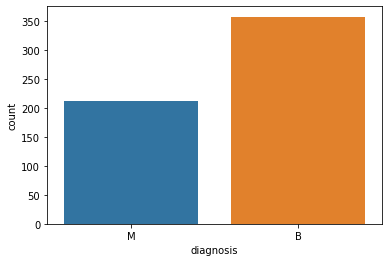

In [29]:
#label을 시각화 해봅시다
import seaborn as sns
sns.countplot(df['diagnosis'])
plt.show()

In [30]:
#label과 feature들을 분리시킵니다
#y: 데이터셋의 label(or class)
y = df['diagnosis']
#X: 데이터 셋의 feature들
X = df.drop(columns=['diagnosis'])

In [31]:
#train 데이터= X_train(feature들), y_train(class)
#test 데이터 = X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

데이터가 준비가 되었으니 이제 mlpclassifier을 훈련시켜보도록 합시다.

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [33]:
print('mlp accuracy: ', mlp.score(X_test, y_test))

mlp accuracy:  0.9649122807017544


C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


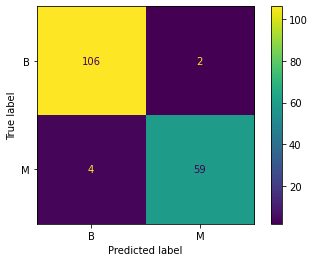

In [34]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp, X_test, y_test, normalize=None, values_format='d')

## 2-2-2 Cross Validation (CV)

교차 검증이란 쉽게 생각하면 본고사를 치르기 전 모의고사를 여러 번 보는 것입니다.

본고사는 테스트 데이터 세트에 대한 마지막 평가로 이해할 수 있고 모의고사는 교차 검증에서 많은 학습과 검증 세트에서 알고리즘 학습과 평가를 수행하는 것입니다.


교차검증이 왜 필요한가?


*  과적합(overfitting)을 피하면서 신뢰성있는 모델평가를 진행하기 위함.
*   일반화  성능을  확인하기  위해  훈련  세트와  테스트  세트로  한번  나누는  것보다 더  안정적이고  뛰어난  통계적  평가  방법


![](https://scikit-learn.org/0.24/_images/grid_search_workflow.png)

## k-fold cross validation

1.   전체 데이터셋을 training /test set으로 분리
2.   training 데이터를 임의의 K개의 fold로 나눔
3.   각 split마다 돌아가면서 한개의 fold데이터셋을 validation data로 지정
4.   이외의 data는 train 데이터로 모델을 훈련시키는데 사용
5.   각 split마다 validation 데이터를 사용하여 모델을 검증
6.   각 split의 검증된 결과들의 평균을 측정


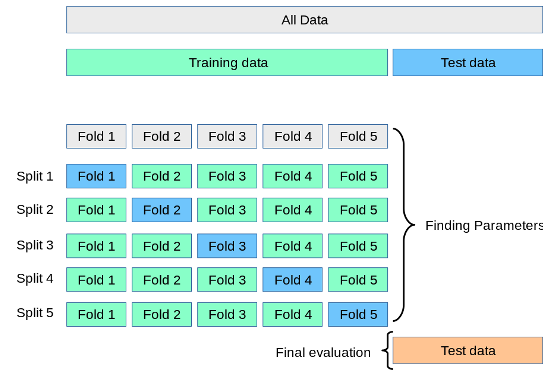


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

scikit learn에서 제공해주는 KFold를 사용하여 kfold시 데이터가 어떻게 split되는지를 실험해봅시다. 
5fold를 실행해보도록 하겠습니다.

In [35]:
n_iter =0
# 데이터셋을 train과 validation으로 나누어주는 KFold를 알아봅니다.
from sklearn.model_selection import KFold

 #train/validation set을 n_splits번 만큼 진행해줌.
kf = KFold(n_splits=5)

#kf.split(x_train)은 x_train데이터 셋을 K번
#train/validation set로 분리시킴
for train_index, val_index in kf.split(X_train):
  n_iter+=1
  #feature data 나눈것
  X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
  #label(class) data 나눈것
  y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
  print('\n===교차 검증 : {0}==='.format(n_iter))
  #data가 어떻게 각 fold마다 나뉘는지 출력
  print(y_train_cv.value_counts())


===교차 검증 : 1===
B    194
M    124
Name: diagnosis, dtype: int64

===교차 검증 : 2===
B    197
M    121
Name: diagnosis, dtype: int64

===교차 검증 : 3===
B    200
M    118
Name: diagnosis, dtype: int64

===교차 검증 : 4===
B    207
M    112
Name: diagnosis, dtype: int64

===교차 검증 : 5===
B    198
M    121
Name: diagnosis, dtype: int64


각 fold마다 데이터가 나뉘는 것을 볼 수 있습니다. 이제 k-fold cross validation을 간단하게 구현할 수 있는 sklearn이 cross_validate를 사용해서 5-fold cross validation을 해보도록 합시다. 
파라미터 중 cv는 fold의 갯수라고 생각하시면 됩니다.

In [36]:
# 5-fold cross validation
from sklearn.model_selection import cross_validate
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
cv_results = cross_validate(mlp, X_train, y_train, cv=5)

In [37]:
#각 fold마다의 validation score을 출력해봅시다.
cv_results['test_score']

array([0.9375    , 0.8625    , 0.95      , 0.93670886, 0.89873418])

In [38]:
# 각 fold마다의 validation accuracy의 평균을 내봅시다. 
print(np.mean(cv_results['test_score']))

0.9170886075949367


## 2-2-3 Gridsearch cross validation

이제 모델의 최적의 하이퍼파라미터를 쉽게 찾을 수 있게 도와주는 gridsearch cv를 사용하여 최적의 하이퍼파라미터를 찾아보도록 하겠습니다.


![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fduzlch%2FbtqQZwOb3Jr%2FKVP1kpnWpIytGZLK4k10Nk%2Fimg.png)


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [39]:
#import gridsearchcv
from sklearn.model_selection import GridSearchCV

In [40]:
#test하고 싶은 파라미터들을 설정합니다
parameter_space = {
    'hidden_layer_sizes': [(3,3), (10,),(100,)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

In [41]:
#parameter space의 파라미터들에 대하여 10-cross validation을 하여 최적의 파라미터를 찾습니다.
#n_jobs=-1 , using all the CPU cores available.
clf_cv = GridSearchCV(MLPClassifier(random_state=42, max_iter=1000), parameter_space, n_jobs=-1, cv=10)
clf_cv.fit(X_train, y_train)

C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\dinle\AppData\Local\Programs\Python\Pyt

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(3, 3), (10,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [42]:
#최고의 성능을 내는 파라미터를 출력합니다.
print('Best parameters found:\n', clf_cv.best_params_)
#cross validation의 best score을 출력합니다.
print("Accuracy CV:",clf_cv.best_score_)

Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy CV: 0.9345512820512821


In [43]:
#최고의 하이퍼파라미터를 저장.
best_config_gs = clf_cv.best_params_
mlp_best=MLPClassifier(random_state=1, max_iter=5000, **best_config_gs) #새로 만든 mlpclassifier에 파라미터로 입력합니다.
#train 데이터로 훈련을 시킨 후
mlp_best.fit(X_train,y_train)

MLPClassifier(activation='logistic', max_iter=5000, random_state=1)

Confusion matrix를 출력해봅니다.

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

predict_train = mlp_best.predict(X_train)
predict_test = mlp_best.predict(X_test)
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[245   4]
 [ 22 127]]
              precision    recall  f1-score   support

           B       0.92      0.98      0.95       249
           M       0.97      0.85      0.91       149

    accuracy                           0.93       398
   macro avg       0.94      0.92      0.93       398
weighted avg       0.94      0.93      0.93       398



In [45]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[108   0]
 [  6  57]]
              precision    recall  f1-score   support

           B       0.95      1.00      0.97       108
           M       1.00      0.90      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


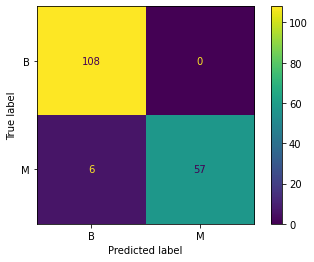

In [46]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp_best, X_test, y_test, normalize=None, values_format='d')

# 실습 과제(총 30점)

실습 4차시 과제는 실습 3차시에서 사용한 abalone dataset을 사용하여 MLPClassifier을 훈련시킬 것입니다.

1. abalone dataset을 preprocessing하고, train, test dataset으로 나누세요.(3차시 코드를 가져와도 상관없습니다.) (1점)
2. scikit-learn의 MLPClassifier을 사용하여 어떠한 모델 파라미터도 조정하지 않은 baseline ```MLPClassifier``` 모델을 생성하고 훈련시켜 테스트 데이터에 대한 정확도를 출력합니다. (1점)
3. 두번째 MLPClassifier 모델을 생성합니다. 이번에는 다큐멘테이션을 읽고 모델 파라미터를 조정합니다. 조정하는 파라미터는 ```hidden_layer_sizes```, ```activation```, ```learning_rate_init```, ```max_iter``` 입니다. 네가지 파라미터를 모두 조정하여도 되고 이 중 선택하여 조정하여도 됩니다. 이 모델이 baseline 모델보다 테스트 데이터에 대해 정확도가 높게 나오도록 파라미터를 조정해야 합니다. 두번째 모델에 대한 정확도 또한 출력합니다.(8점) 

MLPClassifer document: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

4. GridseachCV를 사용하여 best_params_를 찾고, 출력합니다.(위의 실습에서 사용한 parameter_space를 사용하여도, 본인이 설정하여 실험하여도 상관 없습니다.) (10점)
5. 4번에서 찾은 best parameter을 사용하여 새로운 MLPClassifier을 훈련시키고, confusion matrix를 출력합니다.(10점)

# 1

In [63]:
# import abalone data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header = None)

In [64]:
#data preprocessing
df = df.dropna()
df.columns = ["gender", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"]
onehot_df = pd.get_dummies(df.gender, prefix="gender")
df = pd.concat([onehot_df, df], axis=1).drop(["gender"], axis=1)

disc_label = pd.cut(df.rings, bins=[0, 9, 30], labels=[0, 1])
disc_label[:10]
df = df.drop(["rings"], axis=1)
df = pd.concat([df, disc_label.to_frame()], axis=1)
df.head()

,gender_F,gender_I,gender_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [66]:
# split train, validation and test data
from sklearn.model_selection import train_test_split

y = df[["rings"]]   #label
X = df.drop(["rings"], axis=1)


#train과 test split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2505, 10)
(836, 10)
(836, 10)


# 2

In [69]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

In [70]:
print('mlp accuracy: ', mlp.score(X_test, y_test))

mlp accuracy:  0.7882775119617225


# 3

In [75]:
mlp2 = MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=42)
mlp2.fit(X_train, y_train)

C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=42)

In [76]:
print('mlp2 accuracy: ', mlp2.score(X_test, y_test))

mlp2 accuracy:  0.7918660287081339


# 4

In [79]:
parameter_space = {
    'hidden_layer_sizes': [(10,),(50,),(100,)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'max_iter': [100,500,1000],
    'learning_rate': ['constant','adaptive'],
}
clf_cv = GridSearchCV(MLPClassifier(random_state=42), parameter_space, n_jobs=-1, cv=10)
clf_cv.fit(X_train, y_train)

C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [100, 500, 1000]})

In [80]:
print('Best parameters found:\n', clf_cv.best_params_)
#cross validation의 best score을 출력합니다.
print("Accuracy CV:",clf_cv.best_score_)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500}
Accuracy CV: 0.8076175298804781


# 5

In [82]:
best_config_gs = clf_cv.best_params_
mlp_best=MLPClassifier(random_state=1, **best_config_gs)
mlp_best.fit(X_train,y_train)

C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(max_iter=500, random_state=1)

[[1011  240]
 [ 243 1011]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1251
           1       0.81      0.81      0.81      1254

    accuracy                           0.81      2505
   macro avg       0.81      0.81      0.81      2505
weighted avg       0.81      0.81      0.81      2505



C:\Users\dinle\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


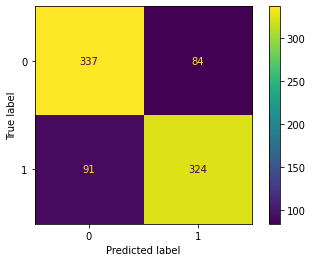

In [84]:
predict_train = mlp_best.predict(X_train)
predict_test = mlp_best.predict(X_test)
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
plot_confusion_matrix(mlp_best, X_test, y_test, normalize=None, values_format='d')